## Observations and Insights 

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [37]:
# Combine the data into a single dataset

combine_data=pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
combine_data.head()
#len(combine_data['Mouse ID'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
len(combine_data)
combine_data.sort_values(['Mouse ID','Timepoint'],ascending=True).head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [36]:
df=combine_data

df.sort_values(['Mouse ID','Timepoint'],ascending=True).head()
df2=df.drop_duplicates(['Mouse ID','Timepoint'])
len(df2)
len(df.drop_duplicates())
pd.unique(df.loc[df['Mouse ID','Timepoint']])

KeyError: ('Mouse ID', 'Timepoint')

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
groupByData = combine_data.groupby(["Drug Regimen"])
groupByData
summaryDF = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summaryDF.head()



,Mean,Median,Variance,Standard Variance,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

groupby_regimen=combine_data.groupby('Drug Regimen')
aggregate = groupby_regimen.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
#aggregate['mean'].map('{:.2f}'.format)
aggregate


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

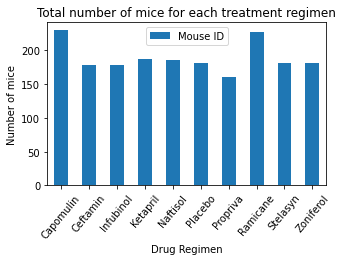

<Figure size 432x288 with 0 Axes>

In [91]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Total_mice_eachregimen1=pd.DataFrame(combine_data.groupby('Drug Regimen').count()['Mouse ID'])
#Total_mice_eachregimen.reset_index(inplace=True)
#Total_mice_eachregimen.style.hide_index(inplace=True)
Total_mice_eachregimen1.plot(kind="bar", figsize=(5,3),rot=50)
plt.title("Total number of mice for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.show()
plt.tight_layout()


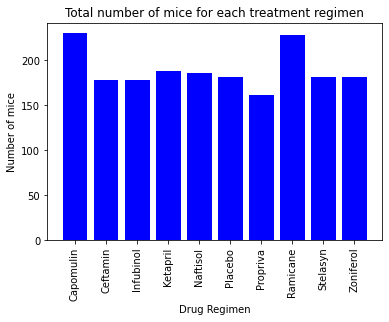

<Figure size 432x288 with 0 Axes>

In [88]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Total_mice_eachregimen2=pd.DataFrame(combine_data.groupby('Drug Regimen').count()['Mouse ID'])
Total_mice_eachregimen2.reset_index(inplace=True)
#x_axis=[]
#x_axis=Total_mice_eachregimen2['Drug Regimen
x_axis=np.arange(len(Total_mice_eachregimen2['Drug Regimen']))
tickLocations = [value for value in x_axis]
y_axis=Total_mice_eachregimen['Mouse ID']
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(tickLocations, Total_mice_eachregimen2['Drug Regimen'], rotation="vertical")

plt.title("Total number of mice for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.show()
plt.tight_layout()


# Pie Plots

In [104]:
miceCount = mouse_metadata["Sex"].value_counts()
miceCount

Male      125
Female    124
Name: Sex, dtype: int64

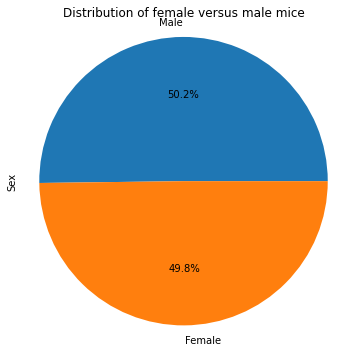

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure()
miceCount.plot(kind="pie",figsize=(5,5),rot=50, autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.show()

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plot.pie(miceCount.values, explode=explode, labels=miceCount.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()



NameError: name 'plot' is not defined

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
